**Algorithm Intuition**  
* REFRESHER:  Bayesian Inference  
![](bayesian_inference.PNG)

* First assumption is that each ad has a reward distribution that is Bernoulli with parameter Theta(i).  
* Theta(i) is unknown - but assumed to have a uniform 0,1 distribution as the prior distribution. 

**PRIOR AND POSTERIOR DISTRIBUTION - REVIEW**  
* Prior and likelihood are said to be conjugate when the resulting posterior distribution is the same type of distribution as the prior.  
* Example:  Binomial data with a beta prior results in a beta posterior.  
* Conjugate priors are not required for bayesian updating - but they make the calculations a lot easier.  
* Beta Parameter has 2 shape parameters - is denoted Beta(alpha, Beta).  
* Bernoulli(p) with p ~ U(0,1) is equivalent to using a Beta(1,1) distribution.  
* To obtain a posterior - use Bayes' rule:  Posterior is proportional to Prior x Likelihood  

* Thompson Algorithm:  
![](thompson_algo.PNG)

* Begin by selecting each option a few times to get some initial data.  
* Use this to generate a distribution of u_star for each option.  
* Trying to mathematically explain what we think is going on.  
* Thompson Sampling is PROBABILISTIC ; UCB was DETERMINISTIC  
* We are estimating where we think u_star values will be ; NOT TRYING to guess distributions behind machines  
* Use this as prior distribution in Bayesian inference ; make a selection from best prior ;  
* Update prior with new data ; select from best updated prior ; repeat  
* Distribution will narrow around actual expected value  

**UCB vs Thompson Sampling**  
* UCB is Deterministic ; Thompson Sampling is Probabilistic  
* UCB requires update every round ; Can accomodate delayed feedback  
* Thompson Sampling - better Empirical Evidence  

* With Thompson Sampling - we are trying to estimate our parameter Theta for each ad (variation).  

In [8]:
# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')


N <- 10000
d <- 10
ads.selected <- integer(0)
#selection.numbers <- integer(d)
#reward.sum <- integer(d)
reward_1 <- integer(d) 
reward_0 <- integer(d)

total.reward <- 0

for(n in 1:N) {
    
    ad <- 0
    max.random <- 0
    
    for(i in 1:d){
        
        random.beta <- rbeta(n = 1,
                            shape1 = reward_1[i] + 1,
                            shape2 = reward_0[i] + 1)

        if(random.beta > max.random) {
            max.random = random.beta
            ad <- i
        }
    }

        ads.selected <- append(ads.selected, ad)
        reward <- dataset[n, ad]
    
    if(reward == 1) {
        
        reward_1[ad] = reward_1[ad] + 1
    } else {
        
        reward_0[ad] = reward_0[ad] + 1
    }
        
        
        total.reward <- total.reward + reward
}

In [9]:
total.reward

[1] 2607

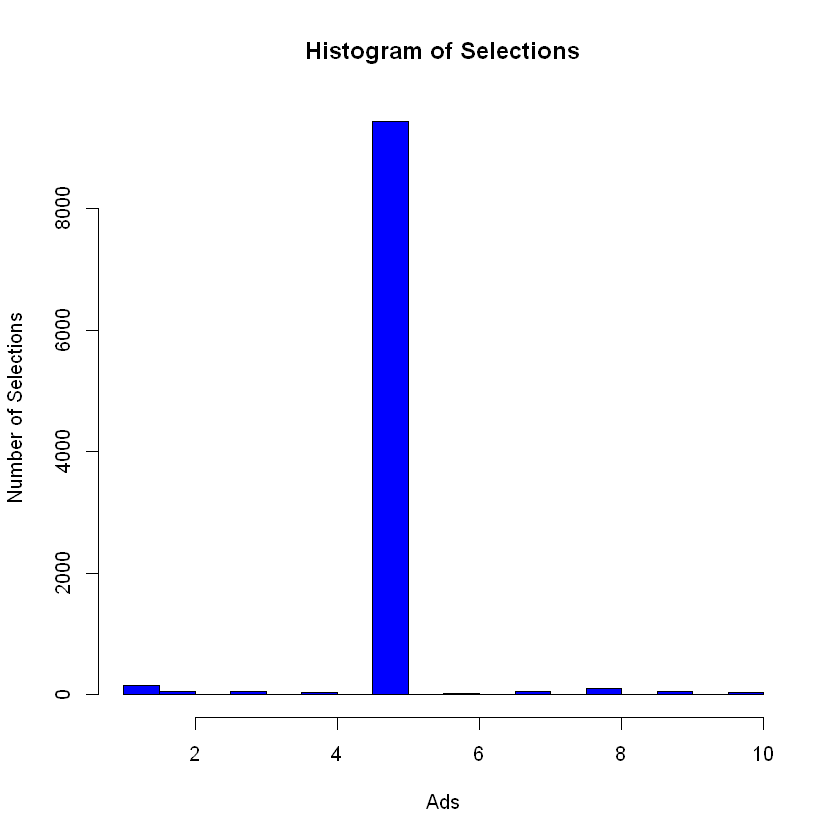

In [10]:
hist(ads.selected,
    col = 'blue',
    main = 'Histogram of Selections',
    xlab = 'Ads',
    ylab = 'Number of Selections')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


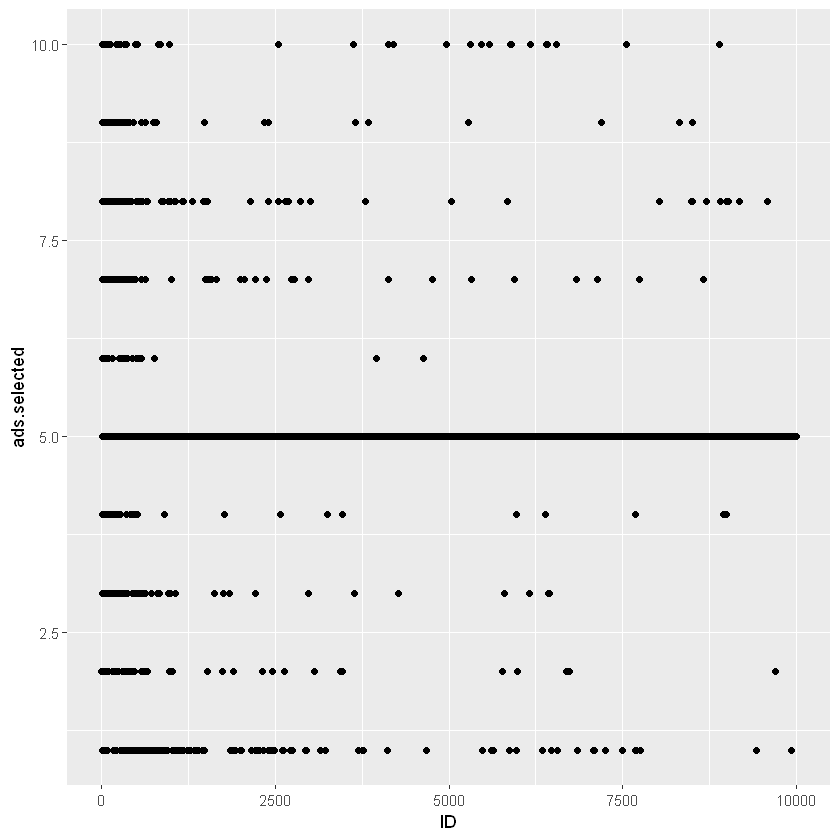

In [11]:
ads.selected <- as.data.frame(ads.selected)
ads.selected$ID <- seq.int(nrow(ads.selected))

library(ggplot2)
ggplot(ads.selected, aes(x = ID, y = ads.selected)) + geom_point()